# Problem 4

Find the Fourier series of $|x|$ where $-\pi < x < \pi$.

a) Compute the general form of Fourier series coefficients (a0, an, bn).

b) Plot the function and the first 5 non-zero terms of the Fourier series.

c) You should notice that there is a jump discontinuity at $x=0$. What is the value of the jump discontinuity (using a 5 non-zero term Fourier series)?

d) How many non-zero terms do you need to include in the Fourier series to have the jump discontinuity at $x=0$ to be less than $0.01$? 

In [36]:
import numpy as np
import matplotlib.pyplot as plt


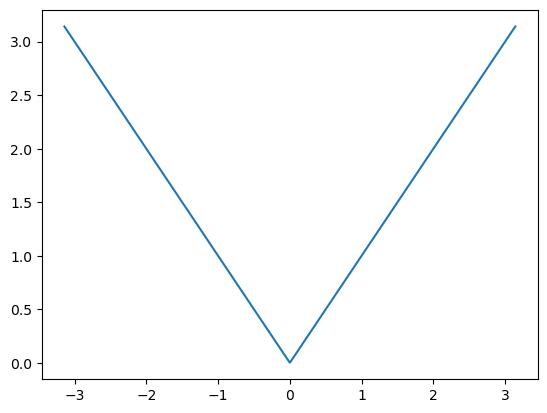

In [37]:
xr = np.linspace(-np.pi, np.pi, 1000)
yr = np.abs(xr)

plt.plot(xr, yr)

In [43]:
from sympy import fourier_series, pi, Abs, symbols, pprint

x = symbols('x')
s = fourier_series(Abs(x), (x, -pi, pi))
s

FourierSeries(Abs(x), (x, -pi, pi), (pi/2, SeqFormula(Piecewise((2*pi*sin(_n*pi)/_n + 2*cos(_n*pi)/_n**2 - 2/_n**2, (_n > -oo) & (_n < oo) & Ne(_n, 0)), (pi**2, True))*cos(_n*x)/pi, (_n, 1, oo)), SeqFormula(0, (_k, 1, oo))))

In [44]:
st = s.truncate(5)
st

-4*cos(x)/pi - 4*cos(3*x)/(9*pi) - 4*cos(5*x)/(25*pi) - 4*cos(7*x)/(49*pi) + pi/2

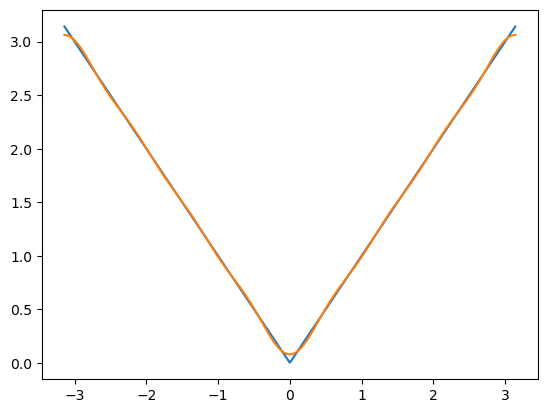

In [45]:
xr = np.linspace(-np.pi, np.pi, 1000)
yr = np.abs(xr)

ys = [st.subs('x', x_) for x_ in xr]

plt.plot(xr, yr)
plt.plot(xr, ys)

In [46]:
import sympy as sym

# Define the symbols
x = sym.symbols('x')
n = sym.symbols('n', integer=True, positive=True)
T = sym.symbols('T', real=True, positive=True)
pi = sym.pi

T = T.subs(T, pi)

# Define the function
f = sym.Abs(x)

# Compute the Fourier coefficients
a0 = 1 / (2*T) * sym.integrate(f, (x, -T, T))

an = 1 / T * sym.integrate(f * sym.cos(n * pi * x / T), (x, -T, T))

bn = 1 / T * sym.integrate(f * sym.sin(n * pi * x / T), (x, -T, T))

an_array = [an.subs(n, i) for i in range(1, 8)]
bn_array = [bn.subs(n, i) for i in range(1, 8)]

a0, an_array, bn_array

(pi/2,
 [-4/pi, 0, -4/(9*pi), 0, -4/(25*pi), 0, -4/(49*pi)],
 [0, 0, 0, 0, 0, 0, 0])

In [47]:
fourier_series = a0

for i in range(1, 8):
    fourier_series += an_array[i-1] * sym.cos(i * pi * x / T) + bn_array[i-1] * sym.sin(i * pi * x / T)
    
fourier_series

-4*cos(x)/pi - 4*cos(3*x)/(9*pi) - 4*cos(5*x)/(25*pi) - 4*cos(7*x)/(49*pi) + pi/2

In [60]:
# jump discontinuity

jump_discontinuity = fourier_series.subs(x, 0).evalf()

jump_discontinuity


0.0791716592393990

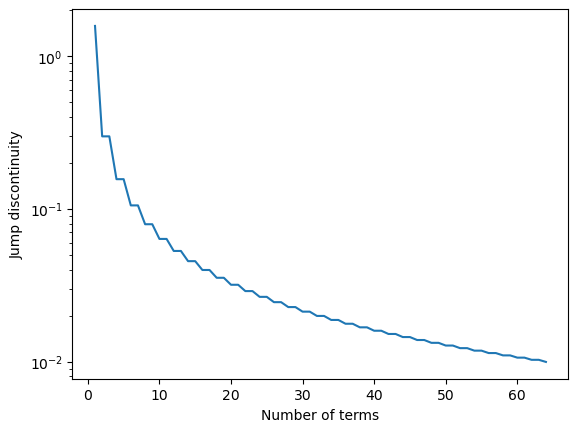

In [63]:
# How many non-zero terms do you need to include in the Fourier series to have the jump discontinuity at  x=0  to be less than  0.01?

nmax = 100

an_array = [an.subs(n, i) for i in range(1, nmax)]
bn_array = [bn.subs(n, i) for i in range(1, nmax)]

nterms = []
jump = []

for i in range(1, nmax):
    
    fourier = a0
    for j in range(1, i):
        fourier += an_array[j-1] * sym.cos(j * pi * x / T) + bn_array[j-1] * sym.sin(j * pi * x / T)
        
    jump_discontinuity = fourier.subs(x, 0).evalf()
    nterms.append(i)
    jump.append(jump_discontinuity)
    
    if jump_discontinuity < 0.01:
        break
        
fig, ax = plt.subplots()
ax.plot(nterms, jump)
ax.set_xlabel('Number of terms')
ax.set_ylabel('Jump discontinuity')
ax.set_yscale('log')
plt.show()